In [1]:
import pandas as pd
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt

In [2]:
file_paths = ['CreditLife/gc1.xlsx',
              'CreditLife/gc2.xlsx',
              'CreditLife/gc3.xlsx',
              'CreditLife/gc4.xlsx'
             ]

for file_name in file_paths:
    #Check in the path to pick the file name
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, :15]
#     name= name.strip()
#     name = name.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    #Name the file columns in each of the datasets
    name.columns = ['Policy_Number', 'member_number', 'Rider', 'Gender', 'Policy_Type', 'status', 
                    'level_of_cover', 'annual_office_premium', 'rider_annual_premium', 
                    'Date_of_Birth', 'Issue_Date', 'Effective_Date', 'renewal_date', 'exit_date', 'cause_of_exit']
    # Exclude headings for different datasets
    name= name[name['rider_annual_premium'] != 'RIDER']
    name= name[name['rider_annual_premium'] != 'ANNUAL PREMIUM']
    name= name[name['member_number'] != "MEMBER M'SHIP"]
    name= name[name['member_number'] != 'NUMBER']
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date', 
          'Effective_Date', 
          'renewal_date', 
          'exit_date'
         ]] = name[['Date_of_Birth', 
                      'Issue_Date', 
                      'Effective_Date', 
                      'renewal_date', 
                      'exit_date']].apply(pd.to_datetime,
                                          format='%Y/%m/%d',
                                          errors='coerce')

    
    # Convert the Level of Cover to Numeric
    name[['level_of_cover', 
          'annual_office_premium',
         'rider_annual_premium']] = name[['level_of_cover', 
                                           'annual_office_premium',
                                          'rider_annual_premium']].apply(pd.to_numeric, 
                                                                           downcast = 'signed', 
                                                                           errors='coerce')
    
    # Create the Year Column 
    name['year']= name['Effective_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")

      # Create new Age Column
    name['age']=name['Issue_Date'].dt.year-name['Date_of_Birth'].dt.year
    
    # Create Age Group Column
    bins = [0, 21, 31, 41, 51, 61, 120]
    labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61-120']
    name ['agegroup'] = pd.cut(name['age'], bins = bins, labels=labels, right = False )  
    
    # Create Sum Assured bands
    bins = [0,100000, 200000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 100000000]
    labels = ['<100k', '100k-200k', '200k-500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', 'Over 3M']
    name ['sum_assured_levels'] = pd.cut(name['level_of_cover'], bins = bins, labels=labels, right = False )
    
    # Create Premium Bands
    bins = [0, 1000, 2000, 5000, 7500, 10000, 20000,  5000000]
    labels = ['<1k', '1k-2k', '2k-5k', '5k-7.5k', '7.5k-10k', '10k-20k', 'Over 20k']
    name['premium_levels'] = pd.cut(name['annual_office_premium'], bins = bins, labels=labels, right = False )
    
    # Delete Empty Rows
    name = name.dropna(thresh=8)
    
    # Fill empty values on the year column
    name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)
    #print(name.sample(10))
    

(1021832, 20)
(783983, 20)
(114980, 20)
(680545, 20)


In [3]:
# Concatenate the datasets into one dataframe
credit = pd.concat([gc1,
                gc2, 
                gc3,
                gc4], 
               ignore_index=True)

print(credit.shape)


credit.head(100)

(2601340, 20)


,Policy_Number,member_number,Rider,Gender,Policy_Type,status,level_of_cover,annual_office_premium,rider_annual_premium,Date_of_Birth,Issue_Date,Effective_Date,renewal_date,exit_date,cause_of_exit,year,age,agegroup,sum_assured_levels,premium_levels
0,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,28900000.0,104040.0,40.0,1969-11-15,2009-11-04,2009-11-04,2015-08-01,2014-11-04,EXPIRED,2009,40.0,31-40,Over 3M,Over 20k
1,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,28900000.0,104040.0,40.0,1969-11-15,2009-11-04,2009-11-04,2015-08-01,2014-11-04,EXPIRED,2009,40.0,31-40,Over 3M,Over 20k
2,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,20000000.0,672800.0,40.0,1948-03-10,2007-07-25,2007-07-25,2015-08-01,2011-07-25,EXPIRED,2007,59.0,51-60,Over 3M,Over 20k
3,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,20000000.0,240000.0,40.0,1967-05-15,2008-05-21,2008-05-21,2015-08-01,2012-05-21,EXPIRED,2008,41.0,41-50,Over 3M,Over 20k
4,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,18580000.0,11148.0,40.0,1969-12-15,2009-12-01,2009-12-01,2015-08-01,2014-12-01,EXPIRED,2009,40.0,31-40,Over 3M,10k-20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,6000000.0,108000.0,40.0,1938-06-20,2009-07-10,2009-07-10,2015-08-01,2012-07-10,EXPIRED,2009,71.0,61-120,Over 3M,Over 20k
96,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,6000000.0,162000.0,40.0,1954-12-12,2011-06-30,2011-06-30,2015-08-01,2016-06-30,EXPIRED,2011,57.0,51-60,Over 3M,Over 20k
97,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,6000000.0,180000.0,40.0,1965-01-01,2011-10-19,2011-10-19,2015-08-01,2016-10-19,EXPIRED,2011,46.0,41-50,Over 3M,Over 20k
98,3 7058 0000,515,2,0,MORTGAGE,ACTIVE,6000000.0,180000.0,40.0,1965-01-01,2011-10-19,2011-10-19,2015-08-01,2016-10-19,EXPIRED,2011,46.0,41-50,Over 3M,Over 20k


# Annual Number of Policy Holders

Annual Coverage 
 year
1900         1
1912         1
1931         2
1932         1
1942         1
1972         2
1974         1
1978         2
1979         1
1981         1
1988         2
1990         6
1991         2
1992         3
1993         9
1994        13
1995        33
1996        62
1997         9
1998         5
1999        15
2000        56
2001        18
2002        85
2003       180
2004       153
2005       186
2006      1775
2007     50978
2008    105566
2009    114953
2010    167494
2011    194546
2012    134973
2013    449579
2014    319124
2015    808302
2016     33262
2017    219936
2127         1
2128         1
Name: year, dtype: int64


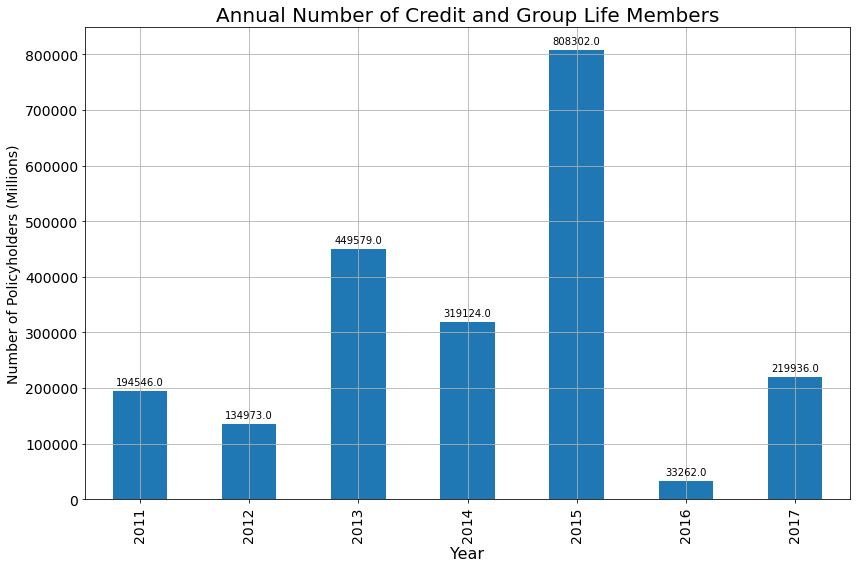

In [4]:
#Plot figures
credit_numbers= credit.groupby(['year'])['year'].count()
print("Annual Coverage \n",credit_numbers)

plt.figure(figsize=(12,8))
ax = credit_numbers.loc['2011':'2017'].plot(kind='bar', fontsize = 14, grid=True)
# for index, value in enumerate():
#     plt.text(value, index, str(value))
ax.set_title('Annual Number of Credit and Group Life Members', fontsize = 20)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Number of Policyholders (Millions)', fontsize = 14)
# ax.bar_label(ax.containers[0], label_type='edge')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()

plt.show()

# Age bands, if data available

Policyholders 
 agegroup
1-20       365232
21-30      437512
31-40     1041595
41-50      593285
51-60      139339
61-120      24377
Name: agegroup, dtype: int64


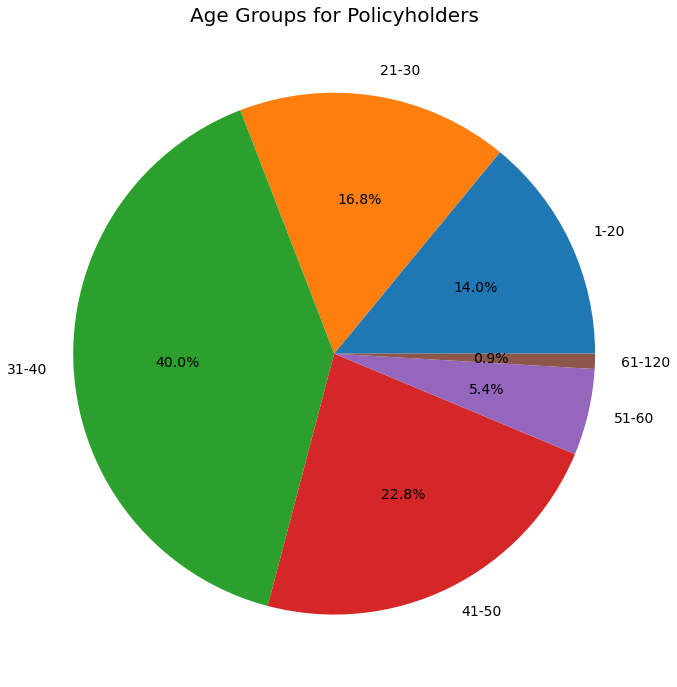

In [5]:
# Age bands, if data available
#Plot figures
credit_numbers= credit.groupby(['agegroup'])['agegroup'].count()
print("Policyholders \n",credit_numbers)

plt.figure(figsize=(12,12))
ax = credit_numbers.plot(kind='pie', autopct='%1.1f%%', fontsize = 14)

ax.set_title('Age Groups for Policyholders', fontsize = 20)
# ax.set_xlabel('Age Groups')
ax.set_ylabel('')

plt.show()

# Sum assured bands

count    2.601340e+06
mean     4.869896e+05
std      4.480200e+06
min     -4.000000e+00
25%      3.600000e+04
50%      2.000000e+05
75%      5.000000e+05
max      6.529986e+09
Name: level_of_cover, dtype: float64
Sum Assured Bands 
 sum_assured_levels
<100k        983881
100k-200k    308924
200k-500k    613292
500k-1M      399654
1M-1.5M      125688
1.5M-2M       60097
2M-2.5M       35191
2.5M-3M       18170
Over 3M       56443
Name: sum_assured_levels, dtype: int64


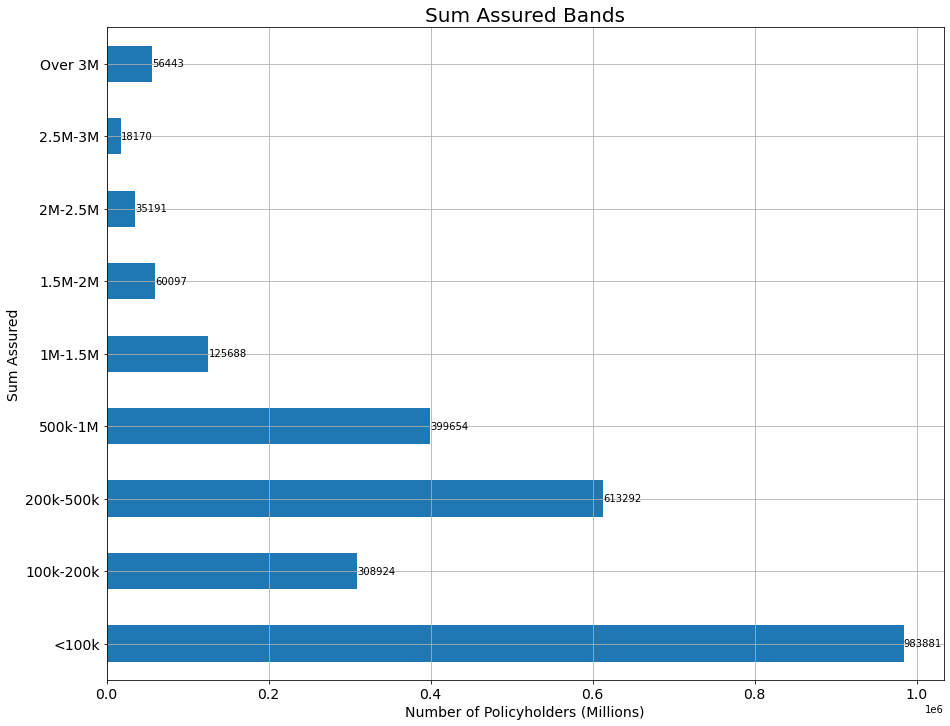

In [6]:
# Create Sum Assured

print(credit ['level_of_cover'].describe())

sum_assured = credit.groupby(['sum_assured_levels'])['sum_assured_levels'].count()
print('Sum Assured Bands \n', sum_assured)
plt.figure(figsize=(15,12))
ax = sum_assured.plot(kind='barh', grid=True, fontsize = 14)

ax.set_title('Sum Assured Bands', fontsize = 20)
ax.set_xlabel('Number of Policyholders (Millions)', fontsize = 14)
ax.set_ylabel('Sum Assured', fontsize = 14)

for i, v in enumerate(sum_assured):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

# Annual Premiums

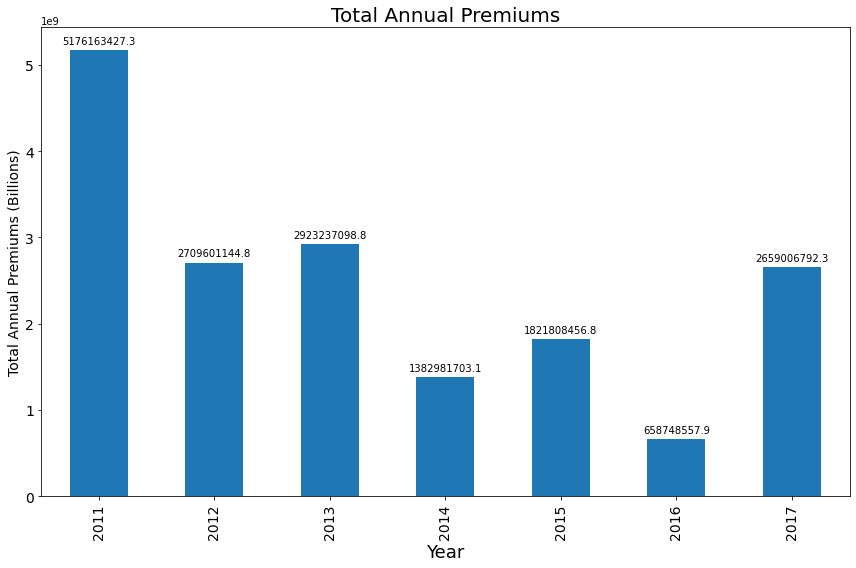

In [7]:
# gl['Annual_Office_Premium'] = filter(str.isdigit, gl["Annual_Office_Premium"])
credit['annual_office_premium'] = pd.to_numeric(credit['annual_office_premium'], downcast = 'signed', errors='coerce')
annual_premiums= credit.groupby(['year'])['annual_office_premium'].sum()

plt.figure(figsize=(12,8))

ax = annual_premiums.loc['2011':'2017'].plot(kind= 'bar', fontsize = 14)
ax.set_title('Total Annual Premiums', fontsize = 20)
ax.set_xlabel('Year', fontsize = 18)
ax.set_ylabel('Total Annual Premiums (Billions)', fontsize = 14)
annual_premiums.head()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()

# Office Premium Bands

count     2601340
unique          7
top           <1k
freq      1263443
Name: premium_levels, dtype: object
Office Premium Bands 
 premium_levels
<1k         1263443
1k-2k        138968
2k-5k        273393
5k-7.5k      152264
7.5k-10k     122597
10k-20k      316119
Over 20k     334556
Name: premium_levels, dtype: int64


Text(0, 0.5, '')

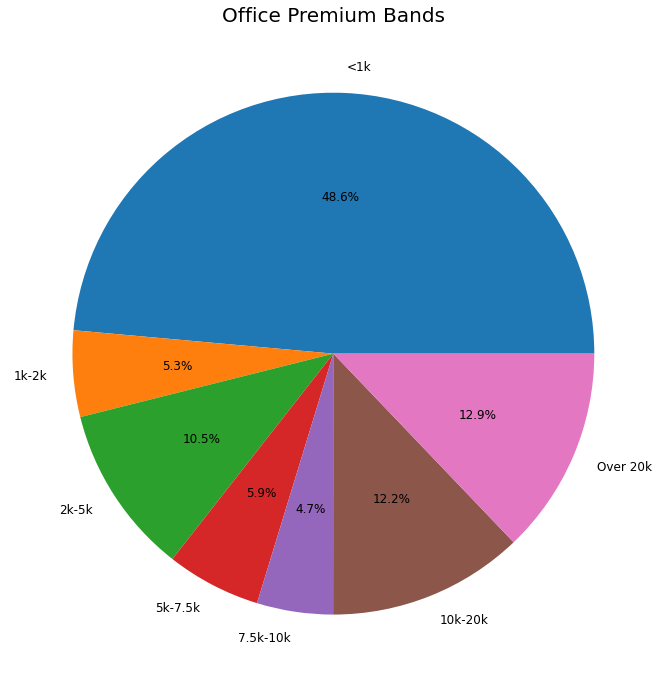

In [8]:
print(credit['premium_levels'].describe())

premium_levels = credit.groupby(['premium_levels'])['premium_levels'].count()
print('Office Premium Bands \n', premium_levels)
plt.figure(figsize=(12,12))
ax = premium_levels.plot(kind='pie', autopct='%1.1f%%', fontsize = 12)

ax.set_title('Office Premium Bands', fontsize = 20)
ax.set_ylabel('')
# ax.set_xlabel('Annual Premiums')
# ax.set_ylabel('Number of Policyholders')

# Average Annual Premiums

Annual Office Premium 
 year
1900    15000.000
1912     2073.570
1931    13443.415
1932       82.500
1942      544.500
Name: annual_office_premium, dtype: float64


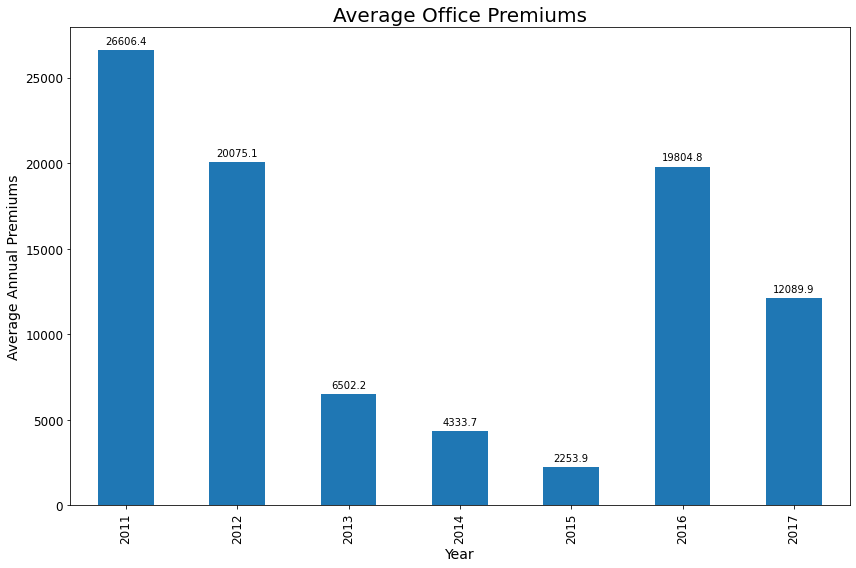

In [9]:
# Average Annual Premiums
#Plot figures
ave_prem= credit.groupby(['year'])['annual_office_premium'].mean()
print("Annual Office Premium \n",ave_prem.head())

plt.figure(figsize=(12,8))
ax = ave_prem.loc['2011':'2017'].plot(kind='bar', fontsize = 12)
# for index, value in enumerate():
#     plt.text(value, index, str(value))
ax.set_title('Average Office Premiums', fontsize = 20)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Average Annual Premiums', fontsize = 14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()

plt.show()

# Chart of Additional Benefits (Riders)

Frequency of Riders 
 Rider
01                                780000
NONE                              613852
2                                 360367
02                                300741
PTD                               104393
Last Expense                       86348
Credit Life                        63941
Permanent And Total Disability     63338
MAIN BENEFIT                       59131
Critical Illness                   50678
Name: Rider, dtype: int64


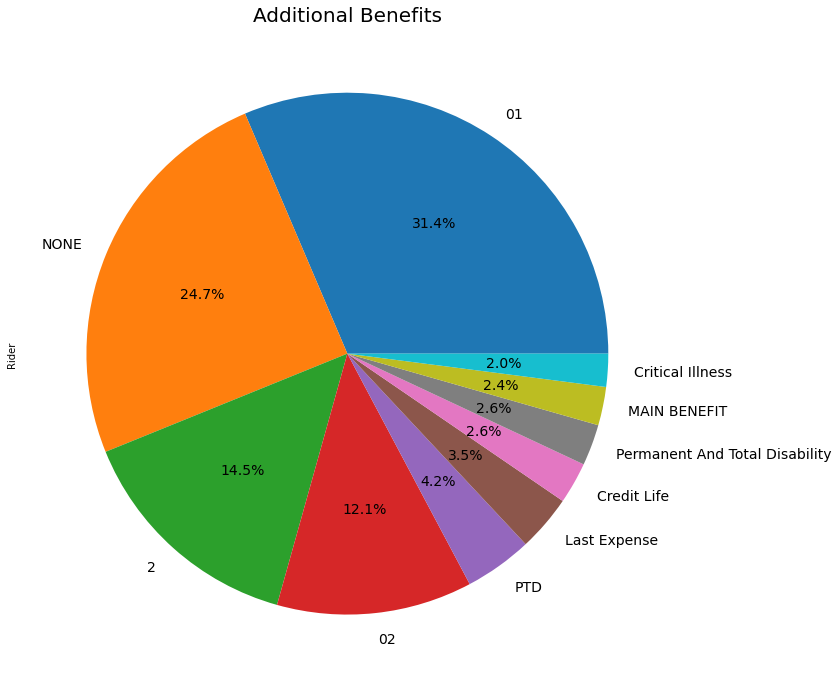

In [10]:
# Additional covers
rider = credit.groupby(['Rider'])['Rider'].count().sort_values(ascending = False)
print("Frequency of Riders \n",rider[:10])

plt.figure(figsize=(12,12))
ax = rider[:10].plot(kind='pie', autopct='%1.1f%%', fontsize = 14)

ax.set_title('Additional Benefits', fontsize = 20)
# ax.set_xlabel('Age Groups')


plt.show()

In [11]:
credit.to_csv(r'combined_csv/credit_and_group_life.csv')

# Credit Life and Group Credit Claims

In [12]:
file_paths = ['CreditLife/credit_life_claims.xlsx',
              'CreditLife/group_credit_claims.xlsx',
             ]

for file_name in file_paths:
    #Check in the path to pick the file name
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, : 16]
    
    
    #Name the file columns in each of the datasets
    name.columns = ['Name_of_Scheme', 'Policy_Number', 
              'Membership_Number', 'Rider', 'Gender', 'Policy_Type', 
              'claim_payable', 'sum_assured', 'amount_paid', 
              'Date_of_Birth', 'Issue_Date', 'Effective_Date', 
              'date_of_death', 'date_reported', 'date_claim_paid', 'cause_of_death']
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date', 
          'Effective_Date', 
          'date_of_death', 
          'date_reported',
          'date_claim_paid']] = name[['Date_of_Birth', 
                                      'Issue_Date', 
                                      'Effective_Date', 
                                      'date_of_death', 
                                      'date_reported',
                                      'date_claim_paid']].apply(pd.to_datetime,
                                                            format='%Y-%m-%d',
                                                            errors='coerce')

    # Convert the Level of Cover to Numeric
    name[['claim_payable', 
          'sum_assured', 
          'amount_paid']] = name[['claim_payable', 
                                           'sum_assured',
                                           'amount_paid']].apply(pd.to_numeric, 
                                                                           downcast = 'signed', 
                                                                           errors='coerce')
    
    
    
    # create column for period between date of death and date reported
    name['reporting_period']=(name['date_reported'] - name['date_of_death']).astype('timedelta64[D]')
    
    # create column for period date of death and payment date
    name['payment_period']=(name['date_claim_paid'] - name['date_of_death']).astype('timedelta64[D]')
    
    # Create reporting period Column
    bins = [0, 90, 180, 270, 365,
            455, 545, 635, 730, 
            820, 910, 1000, 1095,
            5000]
    labels = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36,
              'After 3 years']
    

    name ['reporting_delay'] = pd.cut(name['reporting_period'], bins = bins, labels=labels, right = False )
    
    # Create paymement period Column
    bins = [0, 90, 180, 270, 365,
            455, 545, 635, 730, 
            820, 910, 1000, 
            5000]
    labels = [3, 6, 9, 12, 
              15, 18, 21, 24, 
              27, 30, 33, 'Past 33 months']
    name ['payment_delay'] = pd.cut(name['payment_period'], bins = bins, labels=labels, right = False )
    
    
    
    # Delete Empty Rows
    name = name.dropna(thresh=8)
    
    # Fill empty values on the year column
    name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)
    #print(name.sample(10))
    
    

(9982, 20)
(33652, 20)


In [13]:
# Concatenate the datasets into one dataframe
credit_claims = pd.concat([credit_life_claims, 
                       group_credit_claims
                      ], 
               ignore_index=True)

print(credit_claims.shape)
credit_claims

(43634, 20)


,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,claim_payable,sum_assured,amount_paid,Date_of_Birth,Issue_Date,Effective_Date,date_of_death,date_reported,date_claim_paid,cause_of_death,reporting_period,payment_period,reporting_delay,payment_delay
0,1,300950008201403,00452,FUNERAL EXPENSE,M,GC,352483.00,449233.0,352483.00,1965-01-01,2012-01-01,2012-01-01,2012-03-30,2012-03-29,2012-10-26,"PERSPIVATORY ARREST, POST RENAL TRANSPLANT PNE...",-1.0,210.0,3,9
1,2,300950008201403,2009-04-00080,FUNERAL EXPENSE,M,GC,80700.00,80800.0,80700.00,1962-01-01,2012-01-01,2012-01-01,2012-03-26,2012-04-24,2012-11-26,CARDIAC ARREST DUE TO MANDIBULAR ABCESS,29.0,245.0,3,9
2,3,300950008201403,01200,FUNERAL EXPENSE,M,GC,120150.00,104200.0,120150.00,1945-01-01,2012-02-15,2012-02-15,2012-09-01,2012-09-24,2012-12-18,CANCER OF ESOPHAGUS,23.0,108.0,3,6
3,4,300950008201403,0064-32-00372,FUNERAL EXPENSE,M,GC,313068.24,370402.0,313068.24,1974-01-01,2012-01-01,2012-01-01,2012-07-30,2012-07-30,2012-11-26,HIV,0.0,119.0,3,6
4,5,300950008201403,00363,FUNERAL EXPENSE,F,GC,10000.00,10000.0,10000.00,1965-01-01,2010-01-01,2010-01-01,2010-10-05,2011-11-15,2011-11-17,CRITICAL ILLNESS - CANCER,406.0,408.0,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43629,Group Life,35,17309,40000,SHAHIRA LALANI,CREDIT LIFE,20000.00,80000.0,20000.00,1974-04-30,2012-02-09,2011-08-01,2016-10-23,2016-12-09,2015-05-15,PTD,47.0,348.0,3,12
43630,Group Life,35,17309,200000,SHAHIRA LALANI,LE,200000.00,80000.0,200000.00,1974-04-30,2012-02-09,2011-08-01,2016-01-12,2016-03-01,2015-05-15,PTD,49.0,348.0,3,12
43631,Group Life,35,17309,100000,SHAHIRA LALANI,LE,100000.00,80000.0,100000.00,1974-04-30,2012-02-09,2011-08-01,2015-04-23,2016-07-04,2015-05-15,PTD,438.0,348.0,15,12
43632,Group Life,35,17309,0,SHAHIRA LALANI,LE,200000.00,80000.0,200000.00,1974-04-30,2012-02-09,2011-08-01,2016-07-01,2016-07-04,2015-05-15,PTD,3.0,348.0,3,12


# Period Between Death and Reporting

Months betweenn Death and Reporting 
 reporting_delay
3                12185
6                 8121
9                 6396
12                4195
15                7824
18                1465
21                1093
24                 598
27                 276
30                 203
33                 230
36                 108
After 3 years      940
Name: reporting_delay, dtype: int64


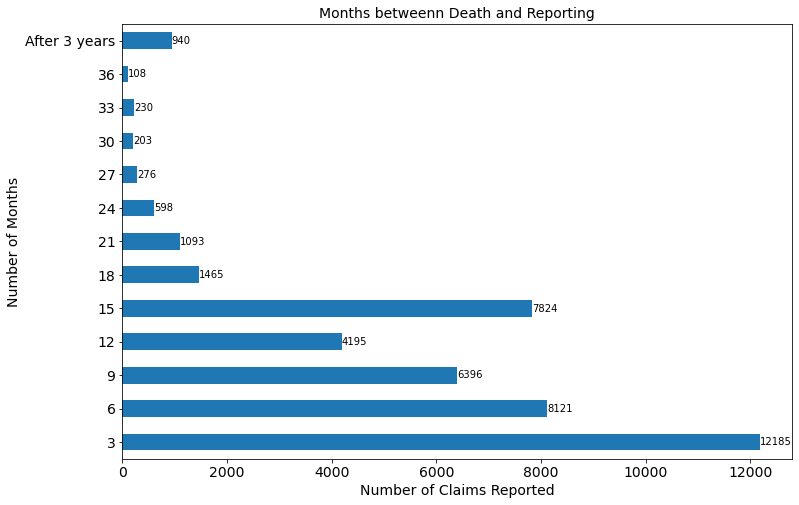

In [14]:
# Period between date of death and when death reported
dor = credit_claims.groupby(['reporting_delay'])['reporting_delay'].count()
print('Months betweenn Death and Reporting \n', dor)


plt.figure(figsize=(12,8))
ax = dor.plot(kind='barh', fontsize = 14)

ax.set_title('Months betweenn Death and Reporting', fontsize = 14)
ax.set_xlabel('Number of Claims Reported', fontsize = 14)
ax.set_ylabel('Number of Months', fontsize = 14)

for i, v in enumerate(dor):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

# Period between date of death of when claim is paid

Months between Death and Payment of Claims 
 payment_delay
3                 11191
6                  6899
9                  4704
12                 3982
15                 3183
18                 1733
21                 1226
24                 1087
27                  422
30                  326
33                 7460
Past 33 months     1421
Name: payment_delay, dtype: int64


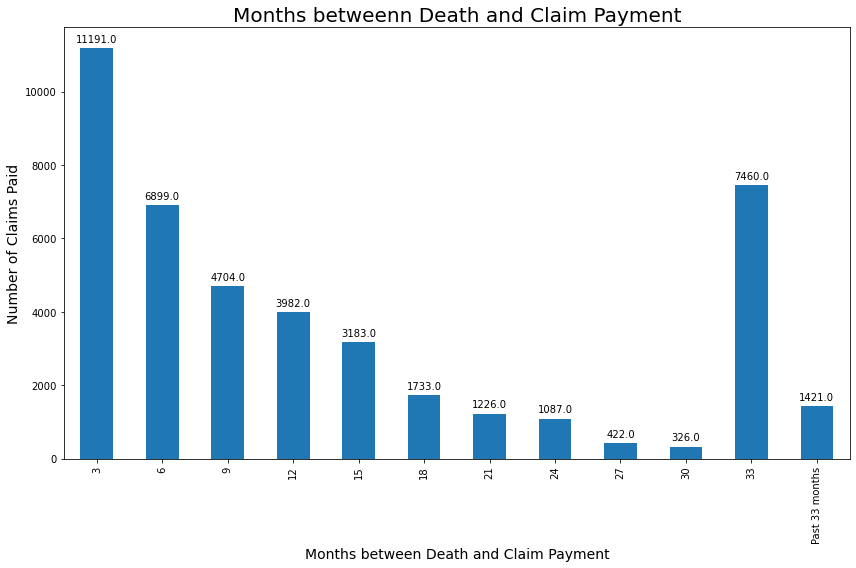

In [15]:
# Period between date of death of when claim is paid
dop = credit_claims.groupby(['payment_delay'])['payment_delay'].count()
print('Months between Death and Payment of Claims \n', dop)

plt.figure(figsize=(12,8))
ax = dop.plot(kind='bar')

ax.set_title('Months betweenn Death and Claim Payment', fontsize = 20)
ax.set_xlabel('Months between Death and Claim Payment', fontsize = 14)
ax.set_ylabel('Number of Claims Paid', fontsize = 14)
# Types of claims (pie chart)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()

# Use a pie chart to get more details about the payment claim payments

Text(0, 0.5, '')

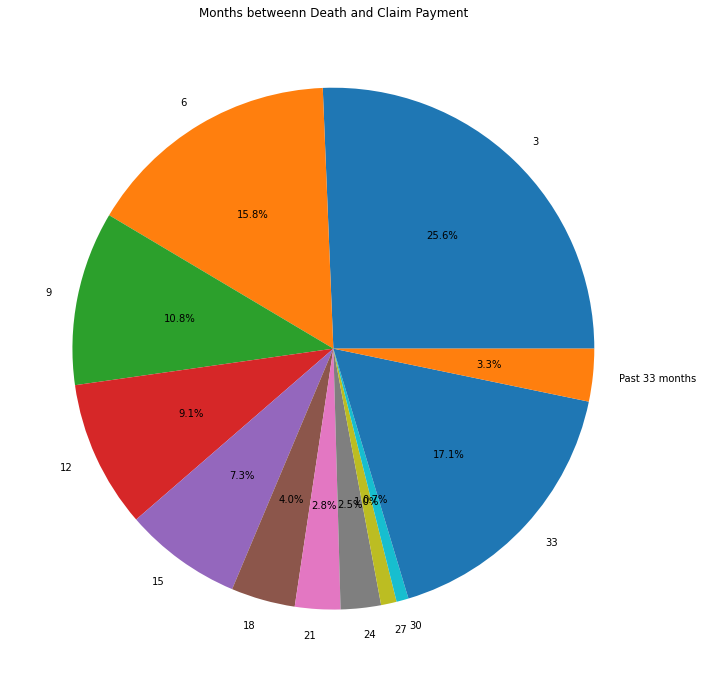

In [16]:
# Use a pie chart to get more details about the payment claim payments

plt.figure(figsize=(12,12))
ax = dop.plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Months betweenn Death and Claim Payment')
ax.set_ylabel('')

In [17]:
# Replace claim types with the same meaning
credit_claims['Policy_Type'] = credit_claims['Policy_Type'].replace(['GROUP CREDITOR', 'Group Credit', 'Group Credit SP', 
                                                                'Group Creditor', 'GROUP CREDIT LIFE', 'GC', 'Group Creditor Open'],'GROUP CREDIT')
credit_claims['Policy_Type'] = credit_claims['Policy_Type'].replace(['Credit Life', 'CL', 'Credit life'], 'CREDIT LIFE')
credit_claims['Policy_Type'] = credit_claims['Policy_Type'].replace(['GM'], 'GROUP MORTGAGE')

claims = credit_claims.groupby(['Policy_Type'])['Policy_Type'].count().sort_values(ascending = False)
print('Most Popular Policy Types \n', claims.head(20))


Most Popular Policy Types 
 Policy_Type
GROUP CREDIT                                                                                           19841
FUNERAL EXPENSE                                                                                         9753
CREDIT LIFE                                                                                             6755
GROUP MORTGAGE                                                                                          6120
GROUP LIFE ASSURANCE                                                                                     695
YES                                                                                                      221
LE                                                                                                       134
CRITICAL ILLNESS,PERMANENT TOTAL DISABILITY WITH SICKNESS,                                                43
CRITICAL ILLNESS,Last Expense ,PERMANENT TOTAL DISABILITY WITH SICKNESS,                

Text(0.5, 1.0, 'Most Popular Claims')

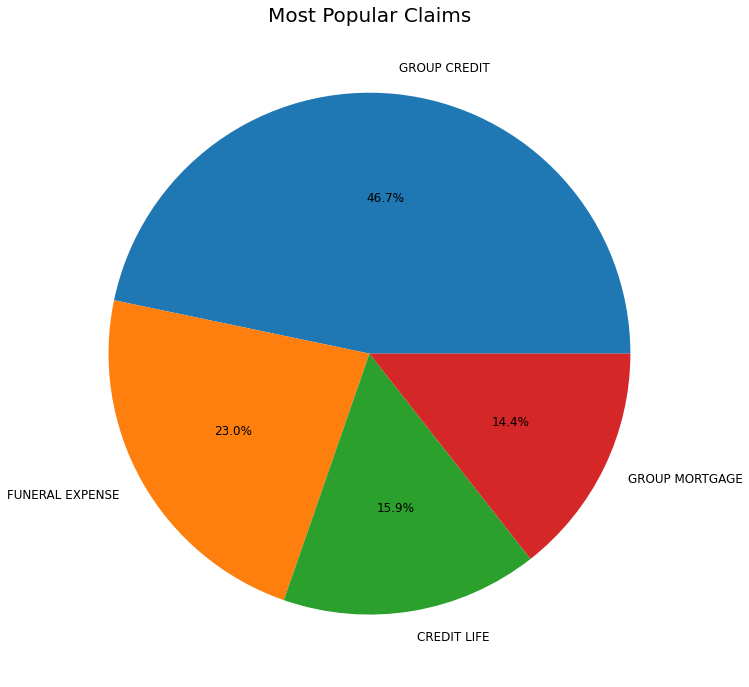

In [18]:
# Types of claims (pie chart)

claims = credit_claims.groupby(['Policy_Type'])['Policy_Type'].count().sort_values(ascending = False)
# print('Most Popular Policy Types \n', claims)

plt.figure(figsize=(12,12))
ax = claims[:4].plot(kind='pie', autopct='%1.1f%%', fontsize = 12)
ax.set_ylabel('')

ax.set_title('Most Popular Claims', fontsize = 20)
# ax.set_xlabel('Number of Policies')
# ax.set_ylabel('Policy Type')

# Sum Assured Bands

count     43624
unique        9
top       <100k
freq      20859
Name: sum_assured_levels, dtype: object
Sum Assured Bands 
 sum_assured_levels
<100k        20859
200k-500k     6409
Over 3M       5285
100k-200k     4890
500k-1M       3200
1M-1.5M       1220
1.5M-2M        727
2M-2.5M        551
2.5M-3M        483
Name: sum_assured_levels, dtype: int64


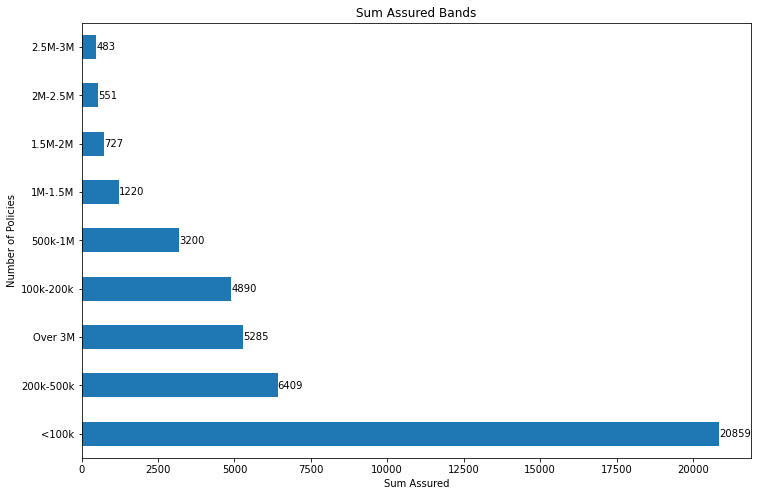

In [19]:
# Create Sum Assured
bins = [0,100000, 200000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 100000000]
labels = ['<100k', '100k-200k', '200k-500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', 'Over 3M']
credit_claims ['sum_assured_levels'] = pd.cut(credit_claims['sum_assured'], bins = bins, labels=labels, right = False )
print(credit_claims ['sum_assured_levels'].describe())

sum_assured = credit_claims.groupby(['sum_assured_levels'])['sum_assured_levels'].count().sort_values(ascending = False)
print('Sum Assured Bands \n', sum_assured)
plt.figure(figsize=(12,8))
ax = sum_assured.plot(kind='barh')

ax.set_title('Sum Assured Bands')
ax.set_xlabel('Sum Assured')
ax.set_ylabel('Number of Policies')

for i, v in enumerate(sum_assured):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

In [20]:
credit_claims.to_csv(r'combined_csv/credit_and_group_life_claims.csv')